# Research Question 1: River extent of influence

What is the spatial extent of influence of the river contribution to surface waters in the CAA?
- Does the RCD span full straits in the CAA? If so, which and during all seasons or only for a portion of the year?
- How long does it take for river contributions in the central CAA to reach Baffin Bay?

In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
import os
from itertools import compress
import datetime as dt

%matplotlib notebook

In [2]:
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar

## Metrics

1. Relative importance of rivers for trace metal cycles; general component comparison (how important are the rivers for Mn)
2. Difference between inflow and outflow of Mn in the Archipelago and its seasonal variation (how important the CAA is for Mn downstream --> useful for implications of results of RQ2). Look at time series of flux across each of the boundaries as well as total difference between inflow and outflow. 
3. Extent of RCD: if proportion of Mn concentration at the particular point in space that is due to the contribution from rivers is greater than x, then the point is defined as in the river domain. Check on 5-day output time scale and on monthly average timescales.
4. Time that it takes for a pulse to pass from continental rivers to Baffin Bay

##### Load domain dimensions for reference:

In [3]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:]) 
tmask = tmask[0,:,1480:2050,160:800]

In [4]:
ref   = nc.Dataset('/data/brogalla/ANHA12/2015/ANHA12-EXH006_y2015m01d05_gridT.nc',  'r')
tlons = np.array(ref.variables['nav_lon'])
tlats = np.array(ref.variables['nav_lat'])
lons  = np.array(ref.variables['nav_lon'])[1480:2050,160:800]
lats  = np.array(ref.variables['nav_lat'])[1480:2050,160:800]
depth = np.array(ref.variables['deptht'])

##### Load Mn model run results:

In [5]:
folder = '/data/brogalla/run_storage/'
file   = 'ANHA12_EXH006_2002_monthly.nc'
 
base   = 'riv-base_2019-06-25T182349.672057-0400/'
incr   = 'riv-increase_2019-06-25T194238.955032-0400/'
glac   = 'riv-glacier_2019-06-25T170724.890280-0400/'

In [6]:
base_monthly = nc.Dataset(folder+base+file)
incr_monthly = nc.Dataset(folder+incr+file)
glac_monthly = nc.Dataset(folder+glac+file)

In [7]:
dmn_base_monthly = np.array(base_monthly.variables['dissolmn'])[:,0,:,:,:]
dmn_incr_monthly = np.array(incr_monthly.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_monthly = np.array(glac_monthly.variables['dissolmn'])[:,0,:,:,:]

In [8]:
print(np.amax(dmn_base_monthly), np.amin(dmn_base_monthly), np.average(dmn_base_monthly))
print(np.amax(dmn_incr_monthly), np.amin(dmn_incr_monthly), np.average(dmn_incr_monthly))
print(np.amax(dmn_glac_monthly), np.amin(dmn_glac_monthly), np.average(dmn_glac_monthly))

1.07923725e-07 0.0 1.0910889e-09
1.6001292e-07 0.0 1.095956e-09
1.07923725e-07 0.0 1.094317e-09


### Metric 1:

Relative importance of rivers for trace metal cycles; general component comparison (how important are the rivers for Mn)

In [9]:
tmask_full    = np.empty(dmn_glac_monthly.shape)
tmask_full[:] = tmask

In [10]:
cglacier_monthly   = dmn_glac_monthly - dmn_base_monthly
mcglacier_monthly  = np.ma.masked_where((tmask_full < 0.1), cglacier_monthly)

continent_monthly  = dmn_incr_monthly - dmn_base_monthly
mcontinent_monthly = np.ma.masked_where((tmask_full < 0.1), continent_monthly)

mbase_monthly      = np.ma.masked_where((tmask_full < 0.1), dmn_base_monthly)
mglac_monthly      = np.ma.masked_where((tmask_full < 0.1), dmn_glac_monthly)
mcont_monthly      = np.ma.masked_where((tmask_full < 0.1), dmn_incr_monthly)

In [11]:
print(np.amax(mcglacier_monthly), np.amin(mcglacier_monthly), np.average(mcglacier_monthly))
print(np.amax(mcontinent_monthly), np.amin(mcontinent_monthly), np.average(mcontinent_monthly))

2.080585e-08 -4.2205262e-10 8.7438329827553e-12
5.208919e-08 -4.869566e-10 1.4351096419338181e-11


<IPython.core.display.Javascript object>


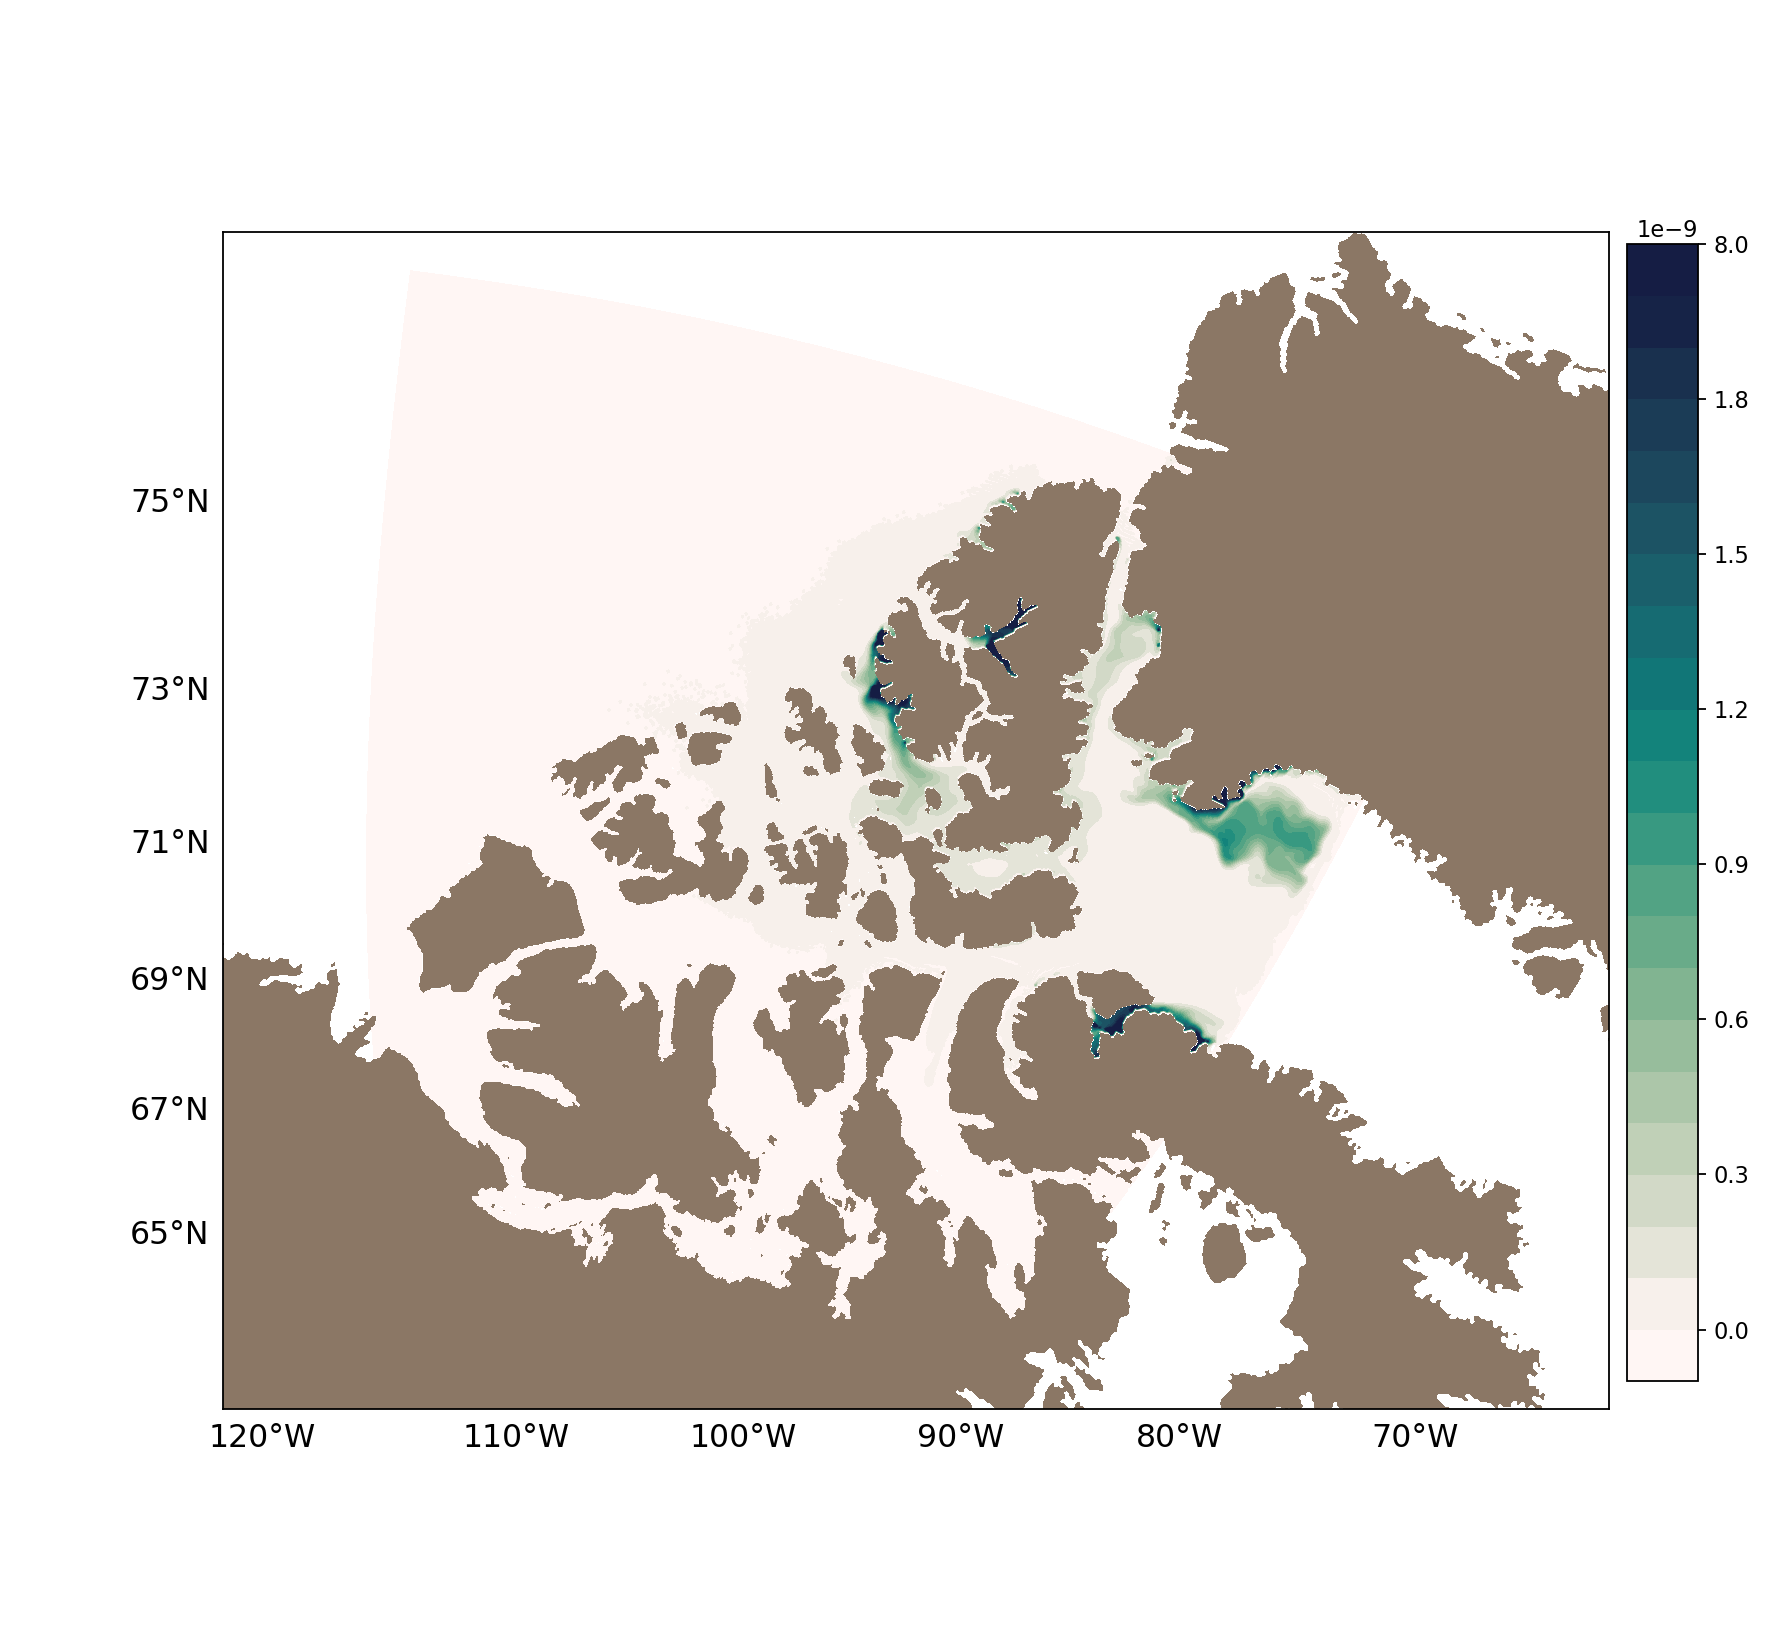

In [12]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.tempo
clevels = [-1e-10, 0, 1e-10, 2e-10, 3e-10, 4e-10, 5e-10, 6e-10, 7e-10, 8e-10, 9e-10, \
           1e-9, 11e-10, 12e-10, 13e-10, 14e-10, 15e-10, 16e-10, 17e-10, 18e-10, 19e-10, 2e-9, 8e-9]

cbar    = proj.contourf(x, y, mcglacier_monthly[8,0,:,:], clevels, vmin=0, vmax=2e-9, cmap=colour)
    
fig     = plt.gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>


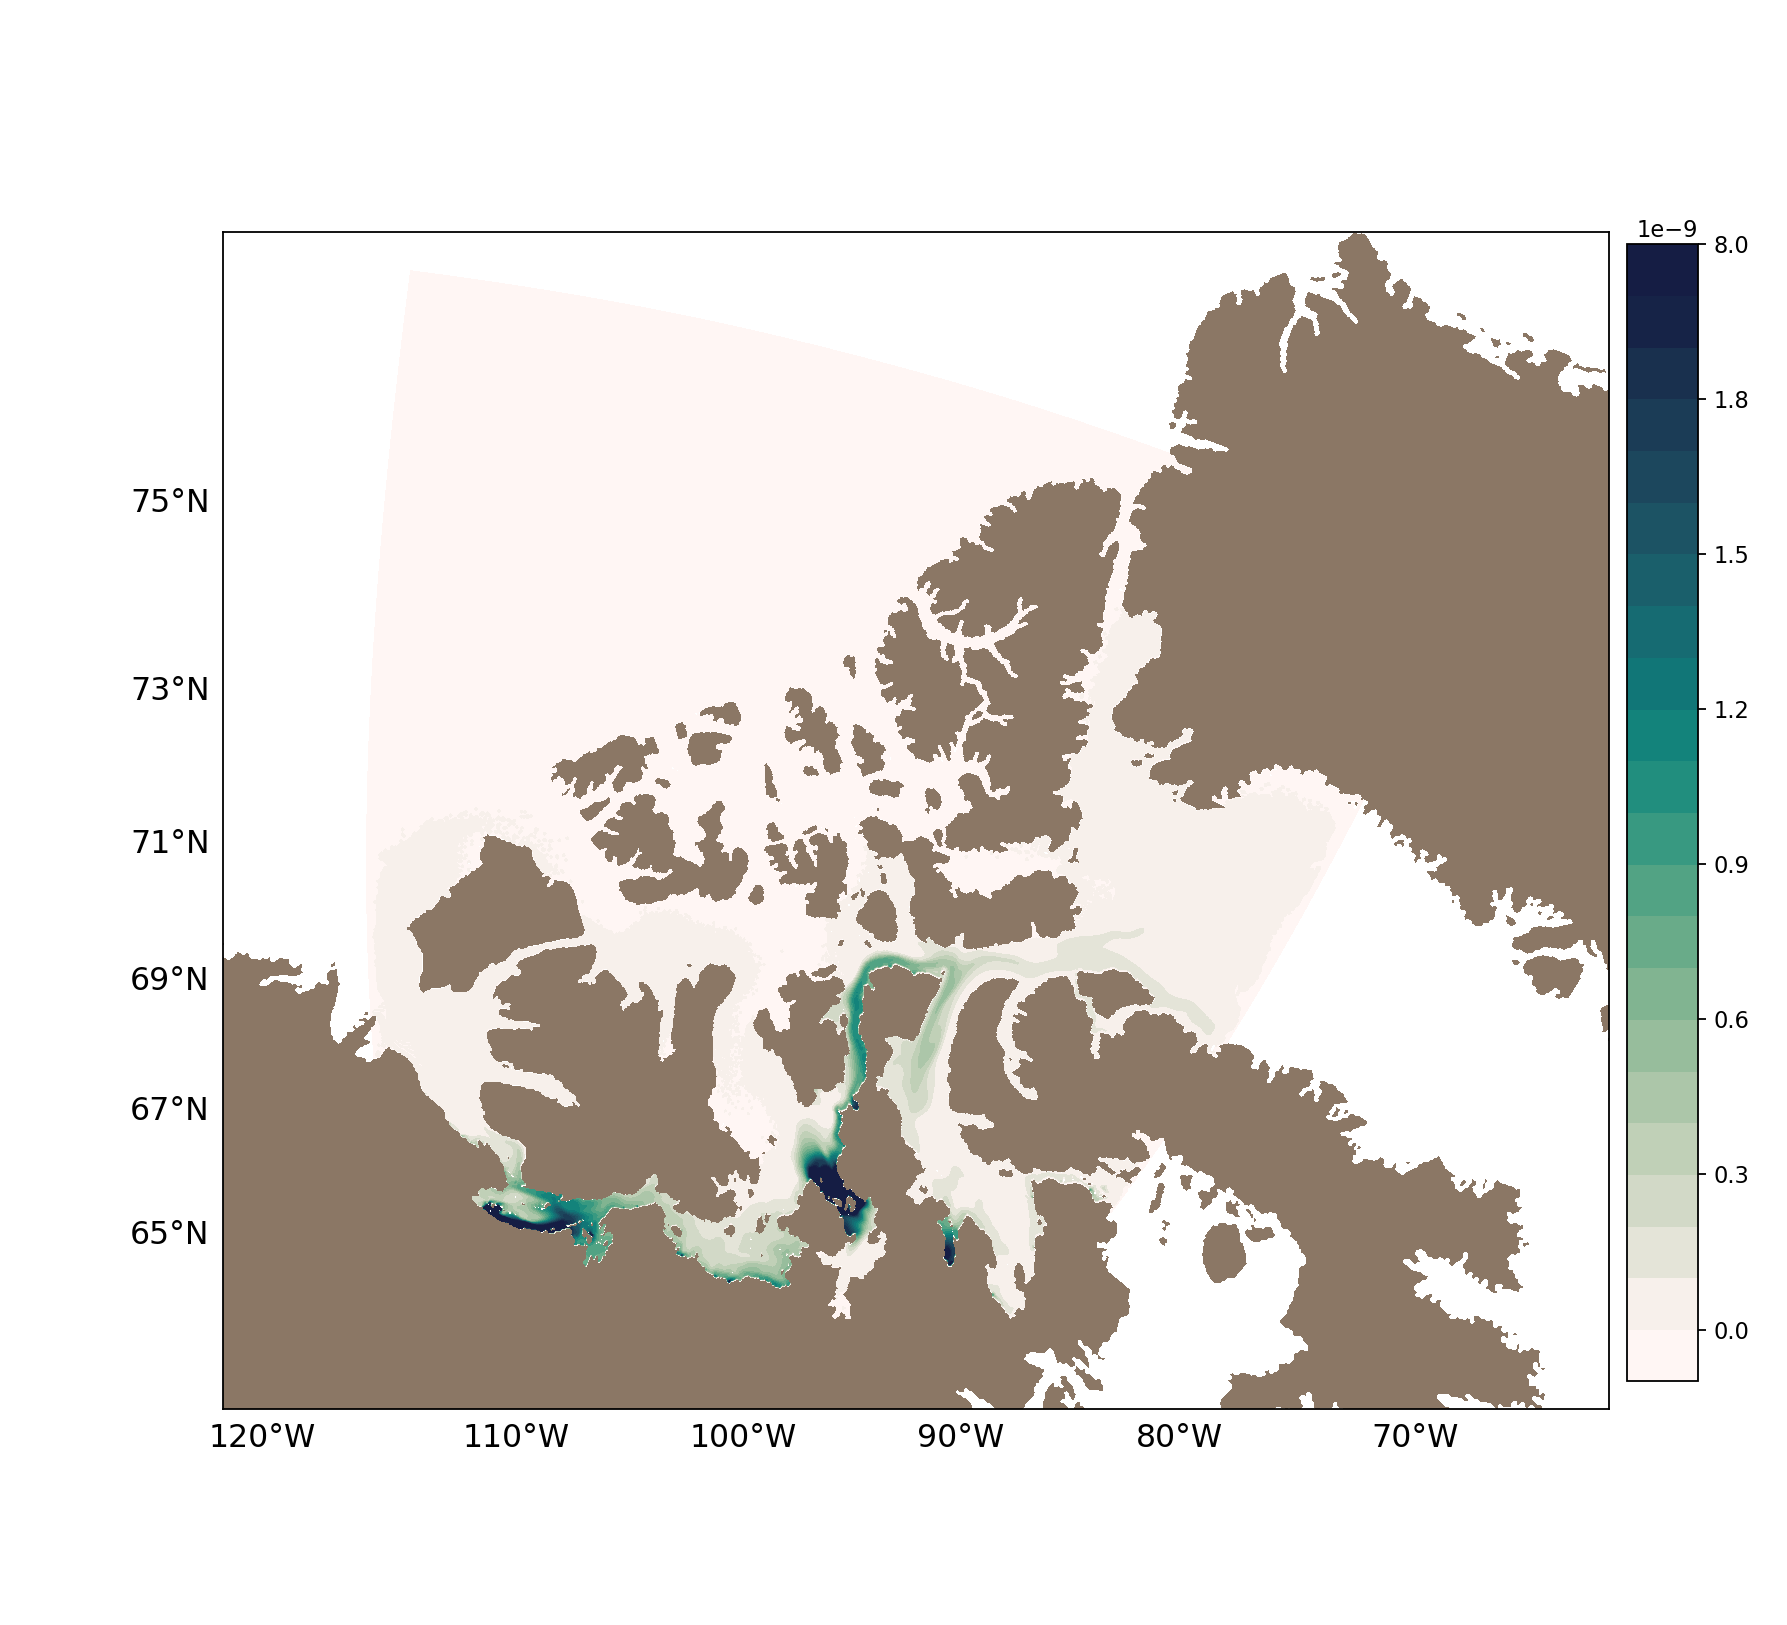

In [13]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.tempo
clevels = [-1e-10, 0, 1e-10, 2e-10, 3e-10, 4e-10, 5e-10, 6e-10, 7e-10, 8e-10, 9e-10, \
           1e-9, 11e-10, 12e-10, 13e-10, 14e-10, 15e-10, 16e-10, 17e-10, 18e-10, 19e-10, 2e-9, 8e-9]

cbar    = proj.contourf(x, y, mcontinent_monthly[8,0,:,:], clevels, vmin=0, vmax=2e-9, cmap=colour)
    
fig     = plt.gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

Calculate the proportional contribution of glacial rivers to each grid cell:

In [12]:
def calculate_river_prop(dmn_riv_on, dmn_riv_off):
    # Input arguments:
    # - dmn_riv_on (t,z,y,x) --- concentration of dMn with riverine contribution on
    # - dmn_riv_off(t,z,y,x) --- concentration of dMn with rivers off
    
    # Contribution of rivers at each point
    diff_rivers = dmn_riv_on - dmn_riv_off
    
    # Contribution of rivers / total concentration (with rivers on):
    # should be an elementwise operation
    prop_river  = np.divide(diff_rivers, dmn_riv_off)
    
    # Output:
    # - prop_river(t,z,y,x)  --- proportional contribution of river to observed [dMn]
    return prop_river

In [13]:
glacier_prop   = calculate_river_prop(mglac_monthly, mbase_monthly)
continent_prop = calculate_river_prop(mcont_monthly, mbase_monthly)

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


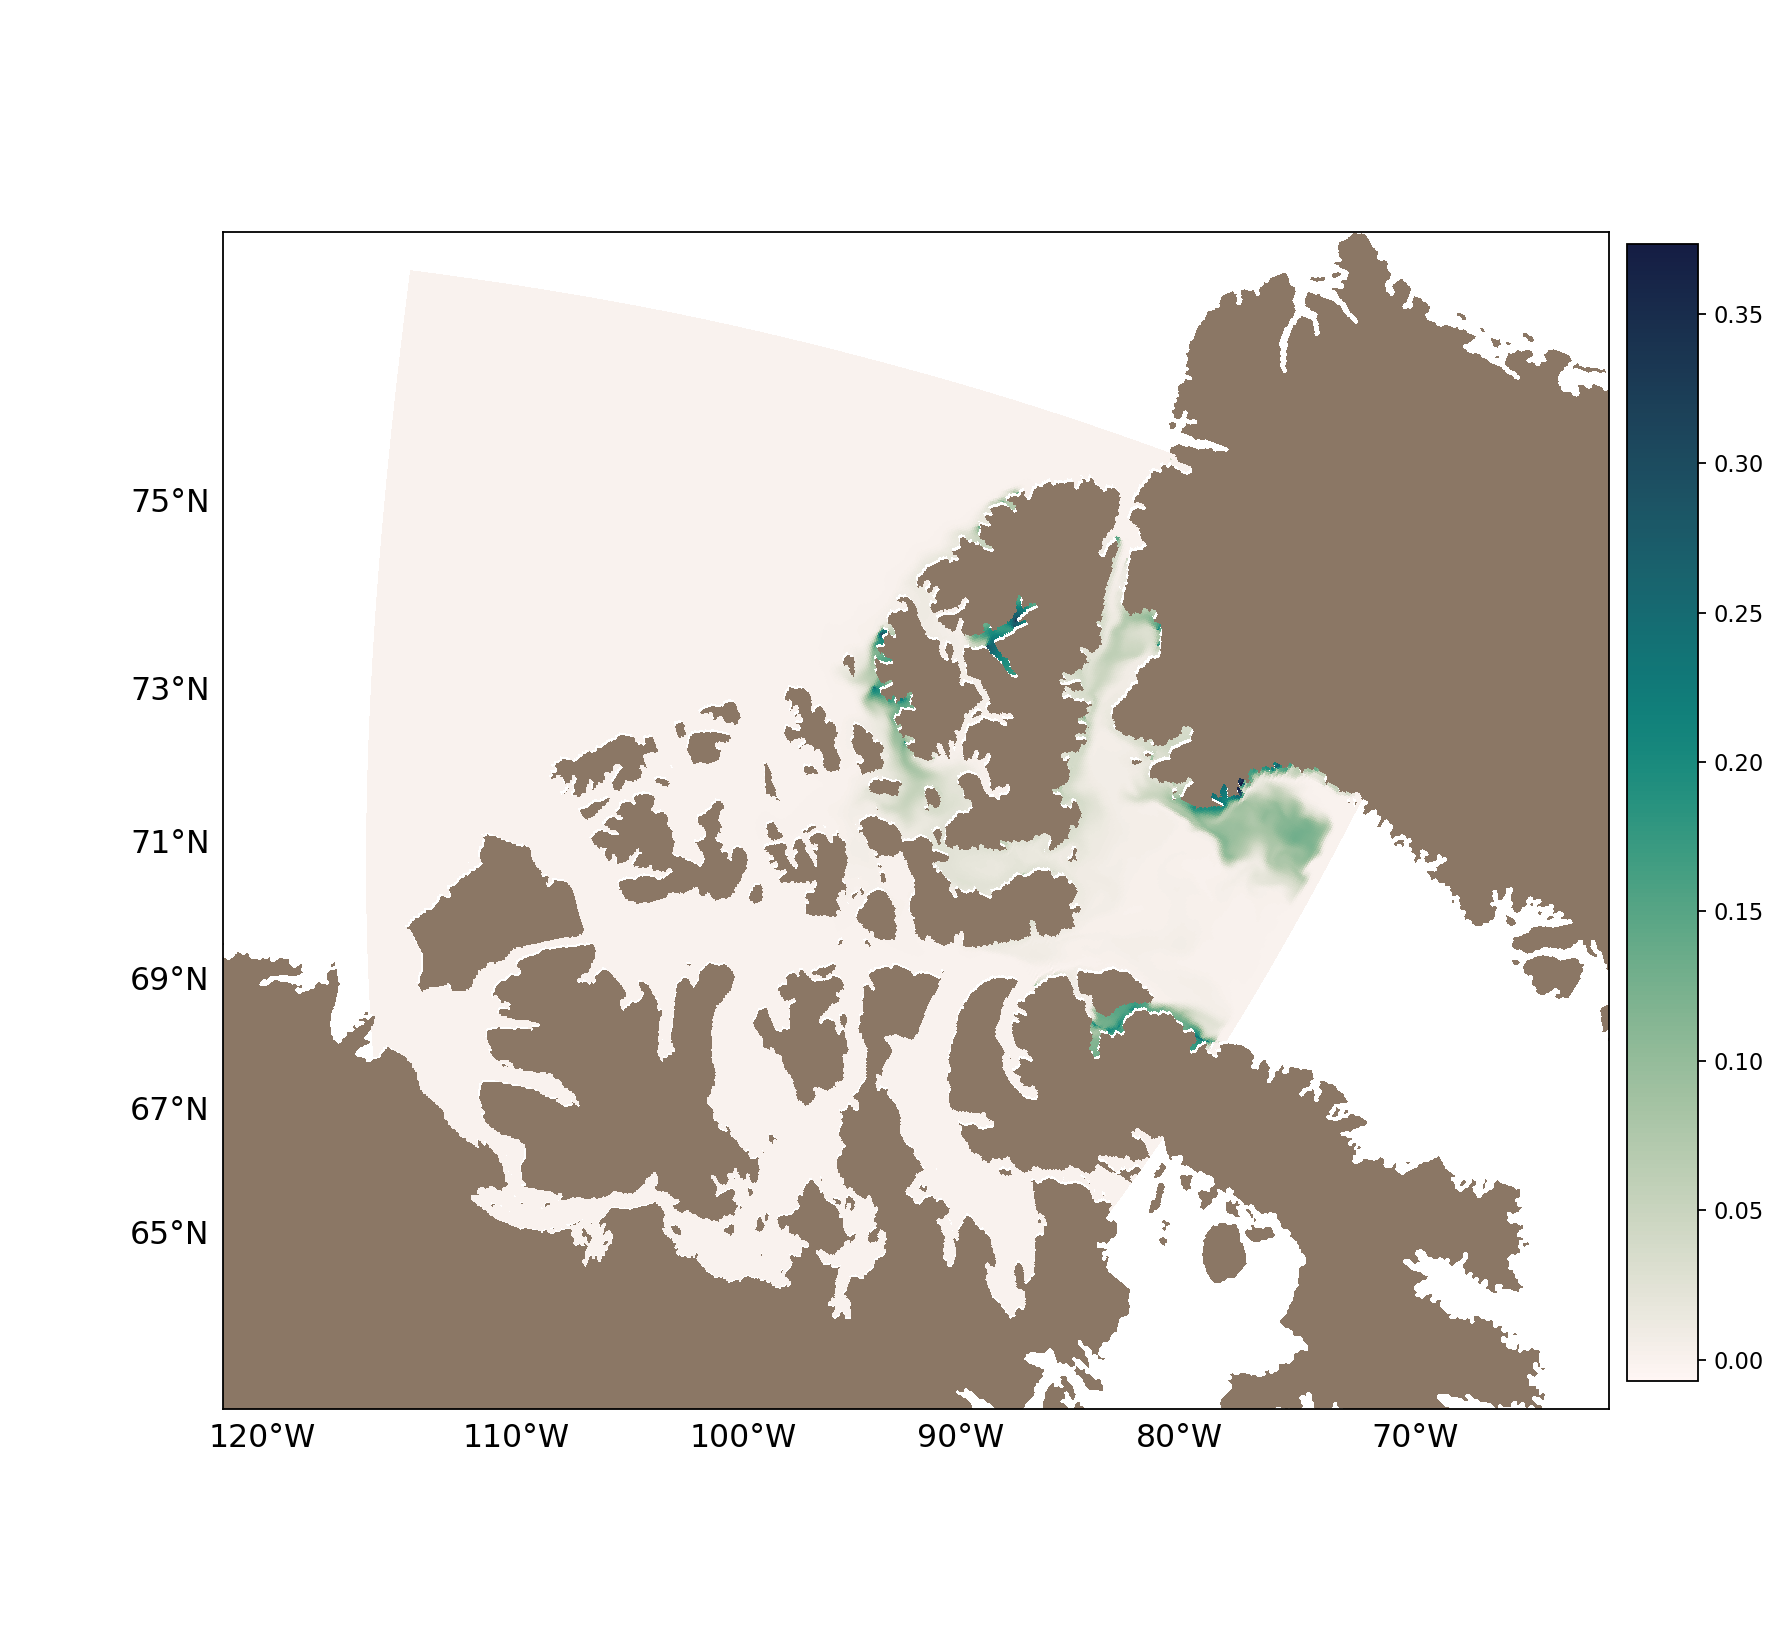

In [17]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.tempo

cbar    = proj.pcolor(x, y, glacier_prop[8,0,:,:], cmap=colour)
    
fig     = plt.gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

### Metric 3:

Extent of RCD: if proportion of Mn concentration at the particular point in space that is due to the contribution from rivers is greater than x, then the point is defined as in the river domain. Check on 5-day output time scale and on monthly average timescales.

In [14]:
def find_RCD(prop_river, tmask, RCD_def=0.3):
    # Input arguments:
    # - prop_river (t,z,y,x) --- contribution of riverine input to total Mn concentration at this point in space
    # - tmask (z,y,x)        --- land mask
    # - RCD_def              --- definition of proportion above which a point is strongly influenced by rivers
    
    # Apply land mask to prop_river grid:
    mprop_river = np.ma.masked_where((tmask < 0.1), prop_river)
    
    RCD = (mprop_river >= RCD_def).astype(int)
    
    # Output:
    # - RCD (t,z,y,x) --- returns 0 (not RCD) or 1 (RCD) for each grid point
    return RCD

In [15]:
RCD_glac = find_RCD(glacier_prop, tmask_full, RCD_def=0.05)
RCD_cont = find_RCD(continent_prop, tmask_full, RCD_def=0.05)

<IPython.core.display.Javascript object>


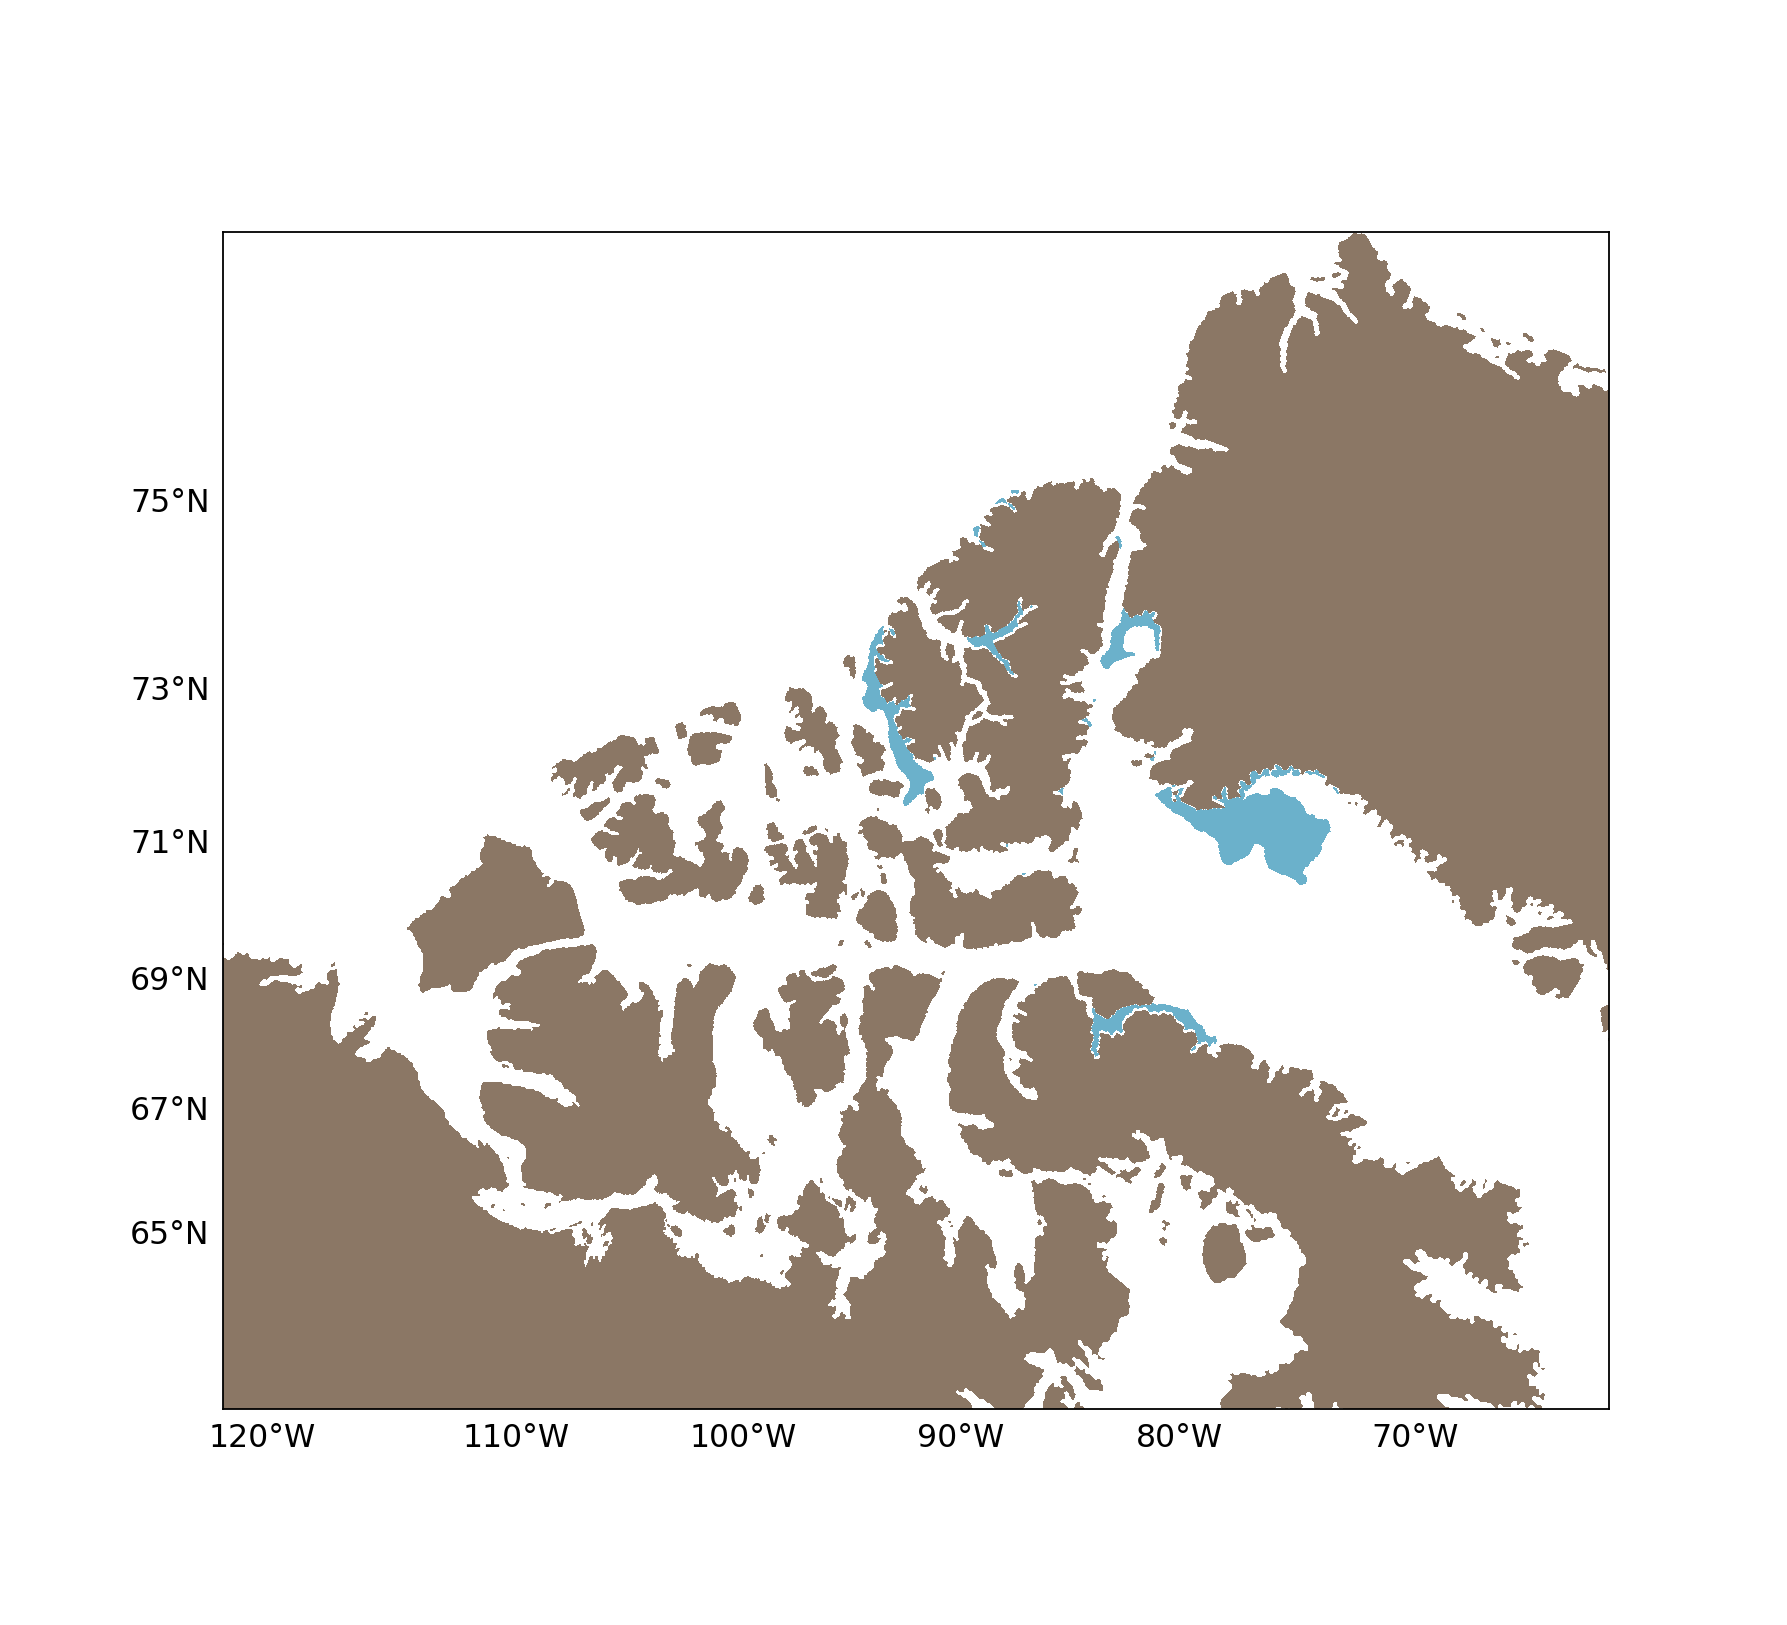

In [18]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.ice_r

proj.contourf(x, y, RCD_glac[8,0,:,:], [0.3, 1], vmin=0.5, vmax=1, cmap=colour)

In [19]:
def months_overview(var, levels, min_v=0.5, max_v=1, proj=proj):
    ax   = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn_subplotsax.pickle','rb'))
    
    x, y = proj(lons, lats)
    colour=cmocean.cm.ice_r
    depth = 0
    cbar  = proj.contourf(x, y, var[0, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,0])
    proj.contourf(x, y, var[1, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,1])
    proj.contourf(x, y, var[2, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,2])
    proj.contourf(x, y, var[3, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,3])
    proj.contourf(x, y, var[4, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,0])
    proj.contourf(x, y, var[5, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,1])
    proj.contourf(x, y, var[6, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,2])
    proj.contourf(x, y, var[7, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,3])
    proj.contourf(x, y, var[8, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,0])
    proj.contourf(x, y, var[9, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,1])
    proj.contourf(x, y, var[10, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,2])
#     proj.contourf(x, y, var[11, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,3])
    
    ax[0,0].set_title('January')
    ax[0,1].set_title('February')
    ax[0,2].set_title('March')
    ax[0,3].set_title('April')
    ax[1,0].set_title('May')
    ax[1,1].set_title('June')
    ax[1,2].set_title('July')
    ax[1,3].set_title('August')
    ax[2,0].set_title('September')
    ax[2,1].set_title('October')
    ax[2,2].set_title('November')
    ax[2,3].set_title('December')

    return

<IPython.core.display.Javascript object>


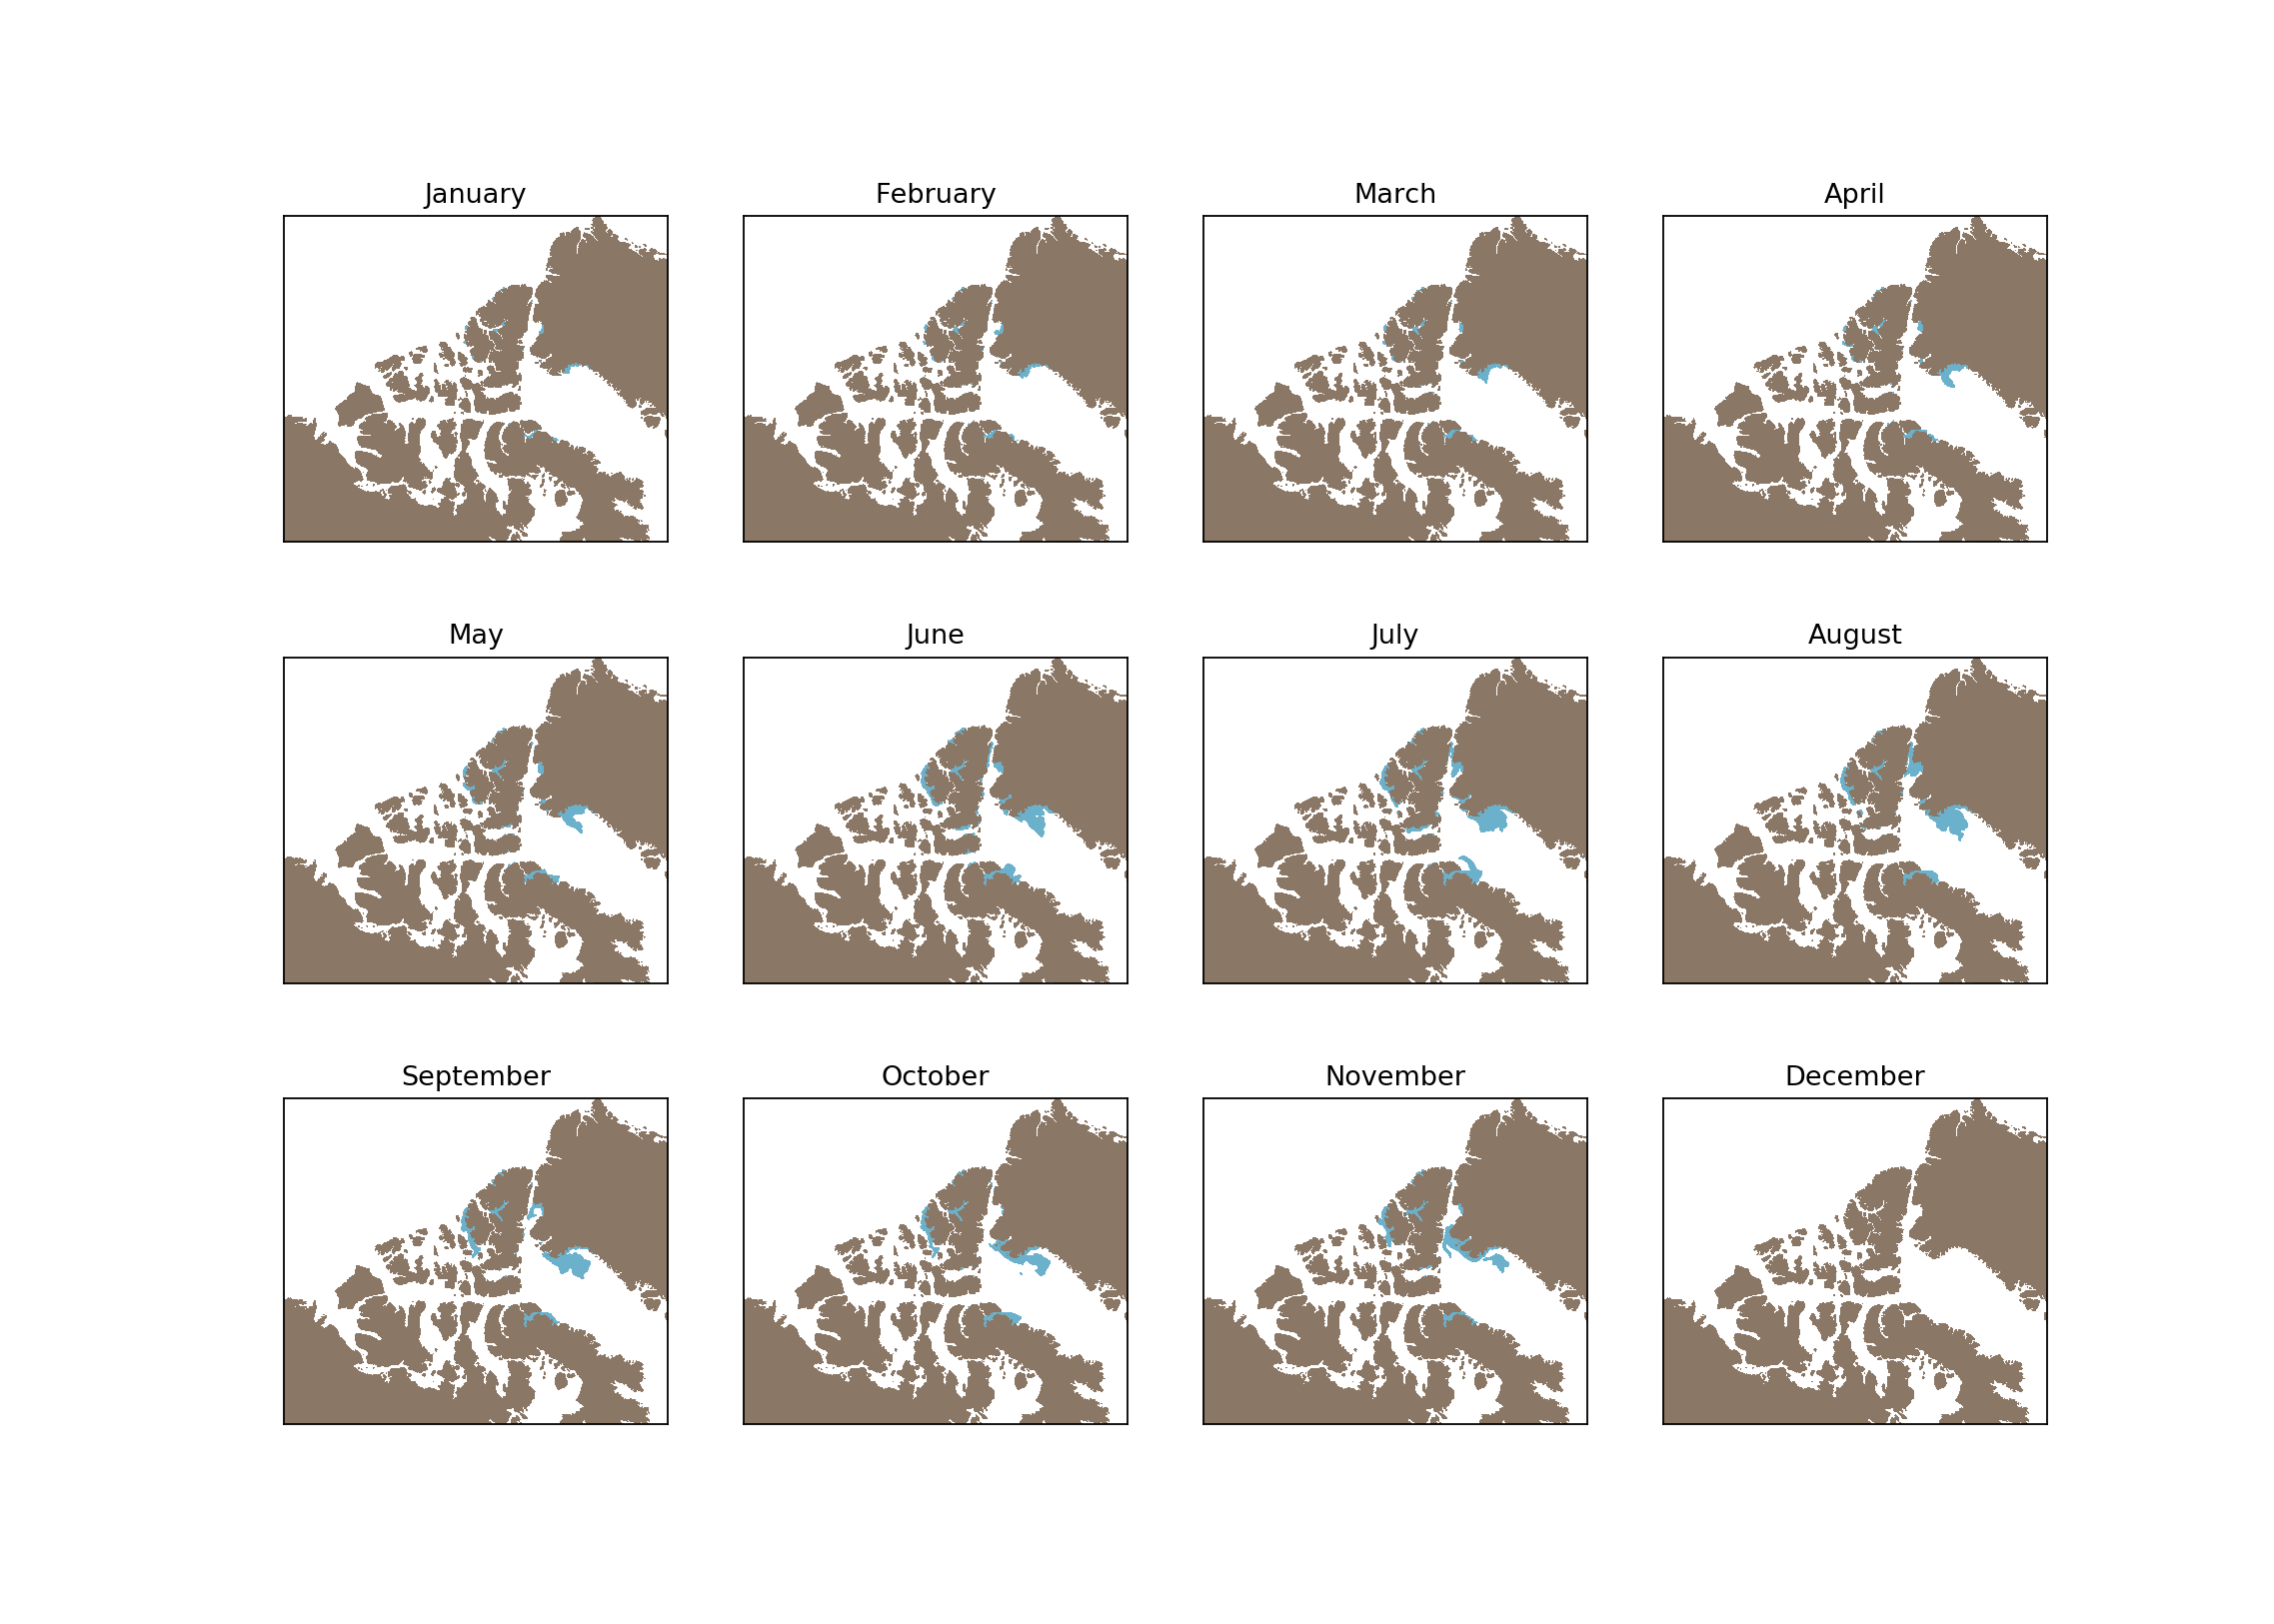

In [22]:
months_overview(RCD_glac, [0.3, 1])

<IPython.core.display.Javascript object>


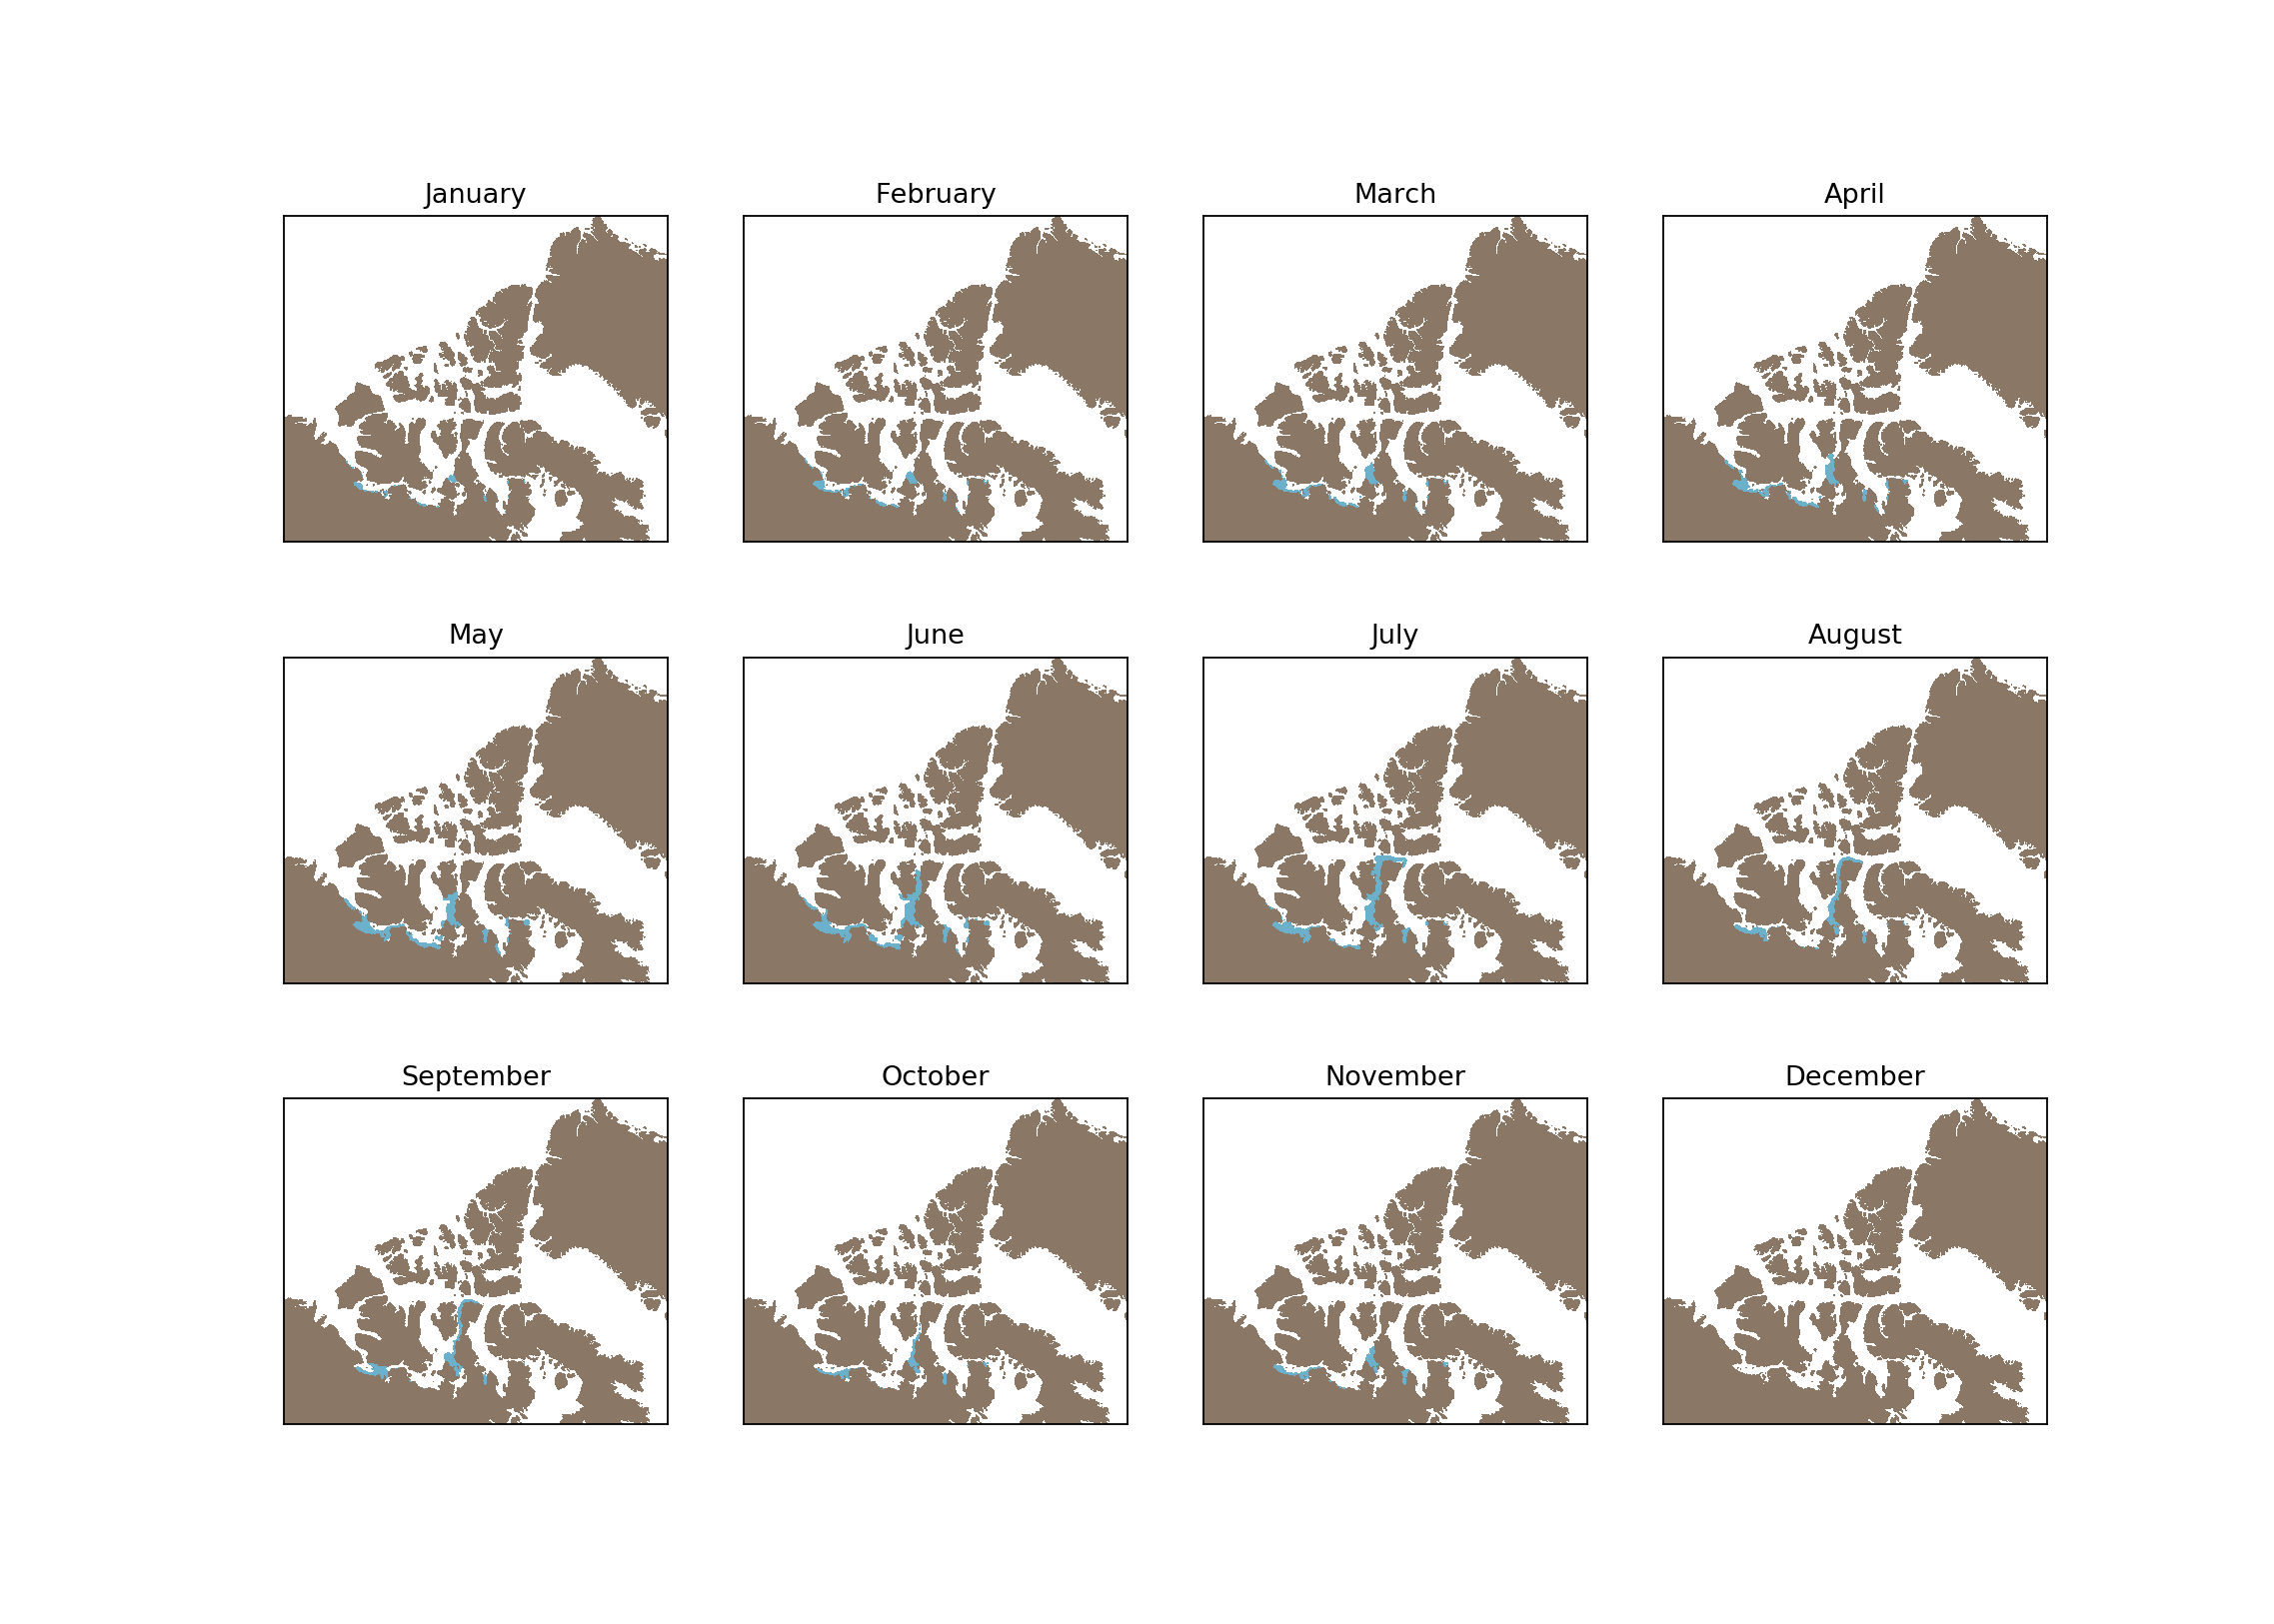

In [23]:
months_overview(RCD_cont, [0.3, 1])

### Metric 2:

Difference between inflow and outflow of Mn in the Archipelago and its seasonal variation (how important the CAA is for Mn downstream --> useful for implications of results of RQ2). Look at time series of flux across each of the boundaries as well as total difference between inflow and outflow.

How to calculate the flux across the boundaries:
- Find indices of grid points associated with each of the boundaries
- Then, for each 5-day file:
    - Multiply 5-day average concentration dMn by the average velocity at that grid point

<IPython.core.display.Javascript object>


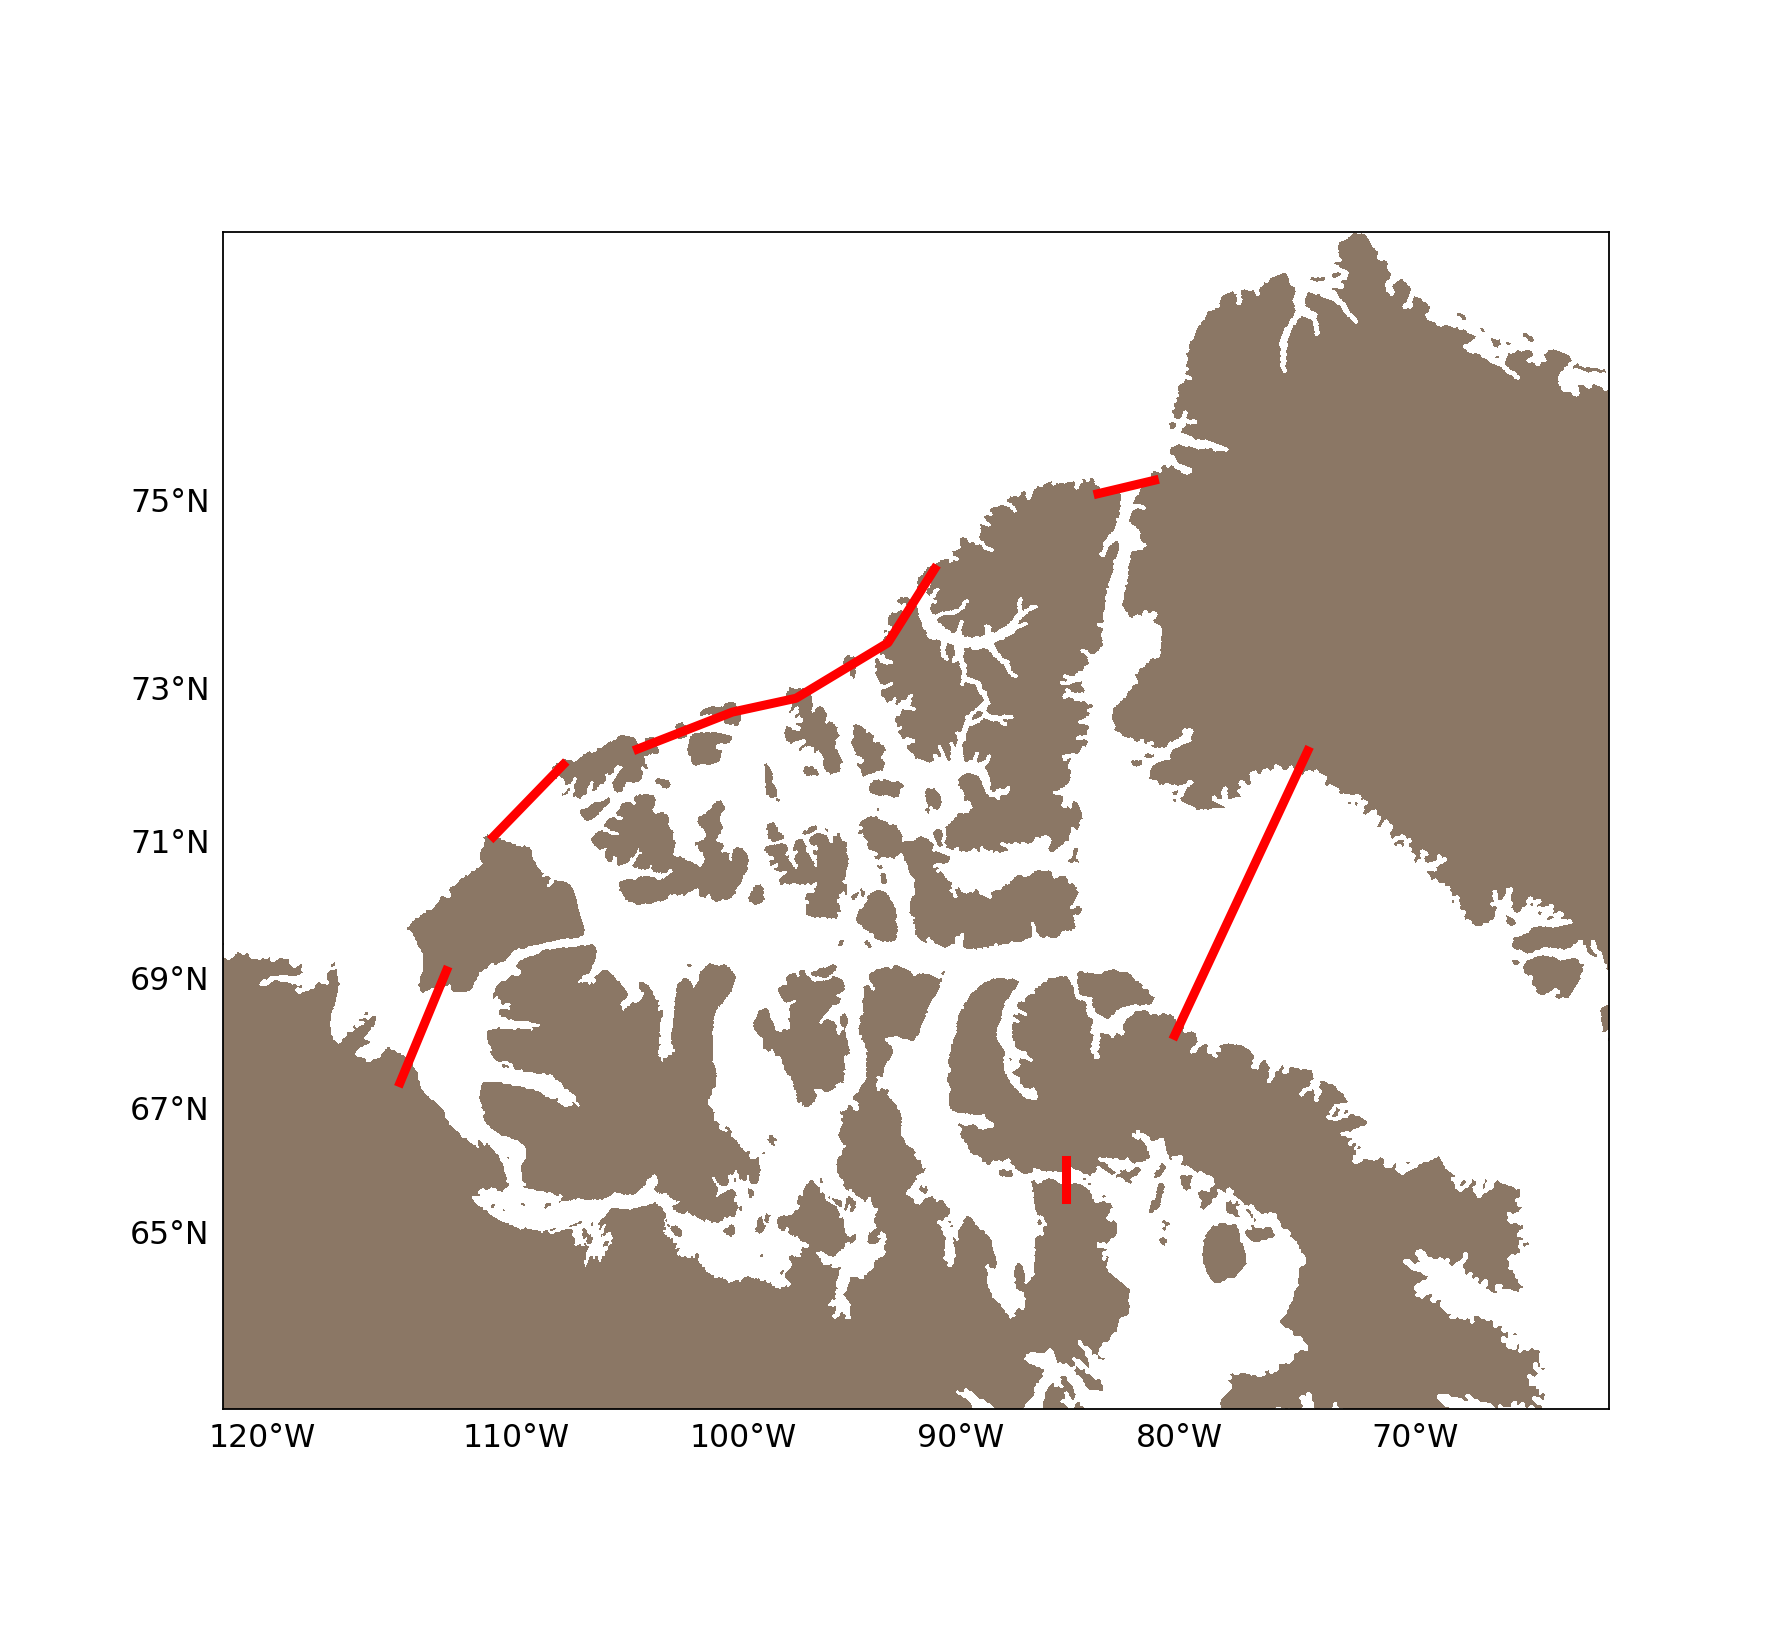

In [20]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

# W Boundaries:
proj.plot([735676, 584385], [1.396e6, 1.240e6],'-r', linewidth=4) 
bdy1_lon, bdy1_lat = proj([735676, 584385], [1.396e6, 1.240e6], inverse=True)
proj.plot([382479, 482870], [707623, 0.95e6],'-r', linewidth=4) 
bdy2_lon, bdy2_lat = proj([382479, 482870], [707623, 0.95e6], inverse=True)

# Northwestern CAA:
proj.plot([896966, 1.102e6, 1.24e6, 1.439e6, 1.54e6], \
          [1.43e6, 1.51e6, 1.54e6, 1.66e6, 1.82e6],'-r', linewidth=4) 
bdy3_lon, bdy3_lat = proj([896966, 1.102e6, 1.24e6, 1.439e6, 1.54e6], \
          [1.43e6, 1.51e6, 1.54e6, 1.66e6, 1.82e6], inverse=True)

# N boundaries:
proj.plot([1.894e6, 2.016e6], [1.983e6, 2.012e6],'-r', linewidth=4) 
bdy4_lon, bdy4_lat = proj([1.894e6, 2.016e6], [1.983e6, 2.012e6], inverse=True)

# E Boundaries:
proj.plot([2.06e6, 2.348e6], [809917, 1.426e6],'-r', linewidth=4)
bdy5_lon, bdy5_lat = proj([2.06e6, 2.348e6], [809917, 1.426e6], inverse=True)
proj.plot([1.825e6, 1.825e6], [455800, 540000],'-r', linewidth=4) 
bdy6_lon, bdy6_lat = proj([1.825e6, 1.825e6], [455800, 540000], inverse=True)

In [45]:
def indx(bdy_lon, bdy_lat):

    x_list = []
    y_list = []
    for i in range(0, len(bdy_lon)):
        x, y = ar.find_closest_model_point(bdy_lon[i], bdy_lat[i], lons, lats)
        x_list = np.append(x_list, x)
        y_list = np.append(y_list, y)
        
    return x_list, y_list

In [46]:
def calculate_indx(bdy1_lon, bdy1_lat, \
                   bdy2_lon, bdy2_lat, \
                   bdy3_lon, bdy3_lat, \
                   bdy4_lon, bdy4_lat, \
                   bdy5_lon, bdy5_lat, \
                   bdy6_lon, bdy6_lat ):
    
    x1, y1 = indx(bdy1_lon, bdy1_lat)
    x2, y2 = indx(bdy2_lon, bdy2_lat)    
    x3, y3 = indx(bdy3_lon, bdy3_lat)
    x4, y4 = indx(bdy4_lon, bdy4_lat)
    x5, y5 = indx(bdy5_lon, bdy5_lat)
    x6, y6 = indx(bdy6_lon, bdy6_lat)
    
    
    return (x1, y1), (x2, y2), (x3, y3), (x4, y4), (x5, y5), (x6, y6) 

In [47]:
def files_time_series(start_date, end_date):
    #start_date and end_date are datetime objects
    
    # Create list of filenames that fall within the start and end date time range:
    file_list = np.sort(os.listdir('/data/brogalla/ANHA12/flux/'))
    
    Vlist = [i[17:22]=='gridV' for i in file_list]
    Ulist = [i[17:22]=='gridU' for i in file_list]
    Plist = [i[35:39]=='ptrc' for i in file_list]
    
    gridV_list = list(compress(file_list, Vlist))
    gridU_list = list(compress(file_list, Ulist))
    gridP_list = list(compress(file_list, Plist))
    
    dateV_list = [dt.datetime.strptime(i[23:34], "y%Ym%md%d") for i in gridV_list]
    dateU_list = [dt.datetime.strptime(i[23:34], "y%Ym%md%d") for i in gridU_list]
    dateP_list = [dt.datetime.strptime(i[42:50], "%Y%m%d")    for i in gridP_list]
    
    gridV_file_list = list(compress(gridV_list, [V > start_date and V < end_date for V in dateV_list]))
    gridU_file_list = list(compress(gridU_list, [U > start_date and U < end_date for U in dateU_list]))
    gridP_file_list = list(compress(gridP_list, [P > start_date and P < end_date for P in dateP_list]))
    
    if len(gridP_file_list ) > len(gridU_file_list):
        gridP_file_list = gridP_file_list[0:-1]
       
    return gridV_file_list, gridU_file_list, gridP_file_list

In [48]:
def boundary_points(bdy1_lon, bdy1_lat, bdy2_lon, bdy2_lat, \
                    bdy3_lon, bdy3_lat, bdy4_lon, bdy4_lat, \
                    bdy5_lon, bdy5_lat, bdy6_lon, bdy6_lat):
    
    bdy1, bdy2, bdy3, bdy4, bdy5, bdy6 = calculate_indx(bdy1_lon, bdy1_lat, bdy2_lon, bdy2_lat, \
                                                    bdy3_lon, bdy3_lat, bdy4_lon, bdy4_lat, \
                                                    bdy5_lon, bdy5_lat, bdy6_lon, bdy6_lat )
    
    # Create transect points for boundaries:
    steps1 = int(np.max([np.abs(bdy1[0][0]-bdy1[0][1]), np.abs(bdy1[1][0]-bdy1[1][1])]))
    steps2 = int(np.max([np.abs(bdy2[0][0]-bdy2[0][1]), np.abs(bdy2[1][0]-bdy2[1][1])]))
    steps4 = int(np.max([np.abs(bdy4[0][0]-bdy4[0][1]), np.abs(bdy4[1][0]-bdy4[1][1])]))
    steps5 = int(np.max([np.abs(bdy5[0][0]-bdy5[0][1]), np.abs(bdy5[1][0]-bdy5[1][1])]))
    steps6 = int(np.max([np.abs(bdy6[0][0]-bdy6[0][1]), np.abs(bdy6[1][0]-bdy6[1][1])]))
    x_bdy1 = np.floor(np.linspace(bdy1[0][0], bdy1[0][1], steps1))
    y_bdy1 = np.floor(np.linspace(bdy1[1][0], bdy1[1][1], steps1))
    x_bdy2 = np.floor(np.linspace(bdy2[0][0], bdy2[0][1], steps2))
    y_bdy2 = np.floor(np.linspace(bdy2[1][0], bdy2[1][1], steps2))
    x_bdy4 = np.floor(np.linspace(bdy4[0][0], bdy4[0][1], steps4))
    y_bdy4 = np.floor(np.linspace(bdy4[1][0], bdy4[1][1], steps4))
    x_bdy5 = np.floor(np.linspace(bdy5[0][0], bdy5[0][1], steps5))
    y_bdy5 = np.floor(np.linspace(bdy5[1][0], bdy5[1][1], steps5))
    x_bdy6 = np.floor(np.linspace(bdy6[0][0], bdy6[0][1], steps6))
    y_bdy6 = np.floor(np.linspace(bdy6[1][0], bdy6[1][1], steps6))
    
    # slightly different case for boundary 3:
    steps31 = int(np.max([np.abs(bdy3[0][0]-bdy3[0][1]), np.abs(bdy3[1][0]-bdy3[1][1])]))
    x_bdy31 = np.floor(np.linspace(bdy3[0][0], bdy3[0][1], steps31))
    y_bdy31 = np.floor(np.linspace(bdy3[1][0], bdy3[1][1], steps31))
    
    steps32 = int(np.max([np.abs(bdy3[0][1]-bdy3[0][2]), np.abs(bdy3[1][1]-bdy3[1][2])]))
    x_bdy32 = np.floor(np.linspace(bdy3[0][1], bdy3[0][2], steps32))
    y_bdy32 = np.floor(np.linspace(bdy3[1][1], bdy3[1][2], steps32))
    
    steps33 = int(np.max([np.abs(bdy3[0][2]-bdy3[0][3]), np.abs(bdy3[1][2]-bdy3[1][3])]))
    x_bdy33 = np.floor(np.linspace(bdy3[0][2], bdy3[0][3], steps33))
    y_bdy33 = np.floor(np.linspace(bdy3[1][2], bdy3[1][3], steps33))
    
    steps34 = int(np.max([np.abs(bdy3[0][3]-bdy3[0][4]), np.abs(bdy3[1][3]-bdy3[1][4])]))
    x_bdy34 = np.floor(np.linspace(bdy3[0][3], bdy3[0][4], steps34))
    y_bdy34 = np.floor(np.linspace(bdy3[1][3], bdy3[1][4], steps34))
    
    x_bdy3 = list(x_bdy31)+list(x_bdy32)+list(x_bdy33)+list(x_bdy34)
    y_bdy3 = list(y_bdy31)+list(y_bdy32)+list(y_bdy33)+list(y_bdy34)
    
    # Create boundary coordinate pairs:
    bdy1 = (x_bdy1, y_bdy1)
    bdy2 = (x_bdy2, y_bdy2)
    bdy3 = (x_bdy3, y_bdy3)
    bdy4 = (x_bdy4, y_bdy4)
    bdy5 = (x_bdy5, y_bdy5)
    bdy6 = (x_bdy6, y_bdy6)
    
    return bdy1, bdy2, bdy3, bdy4, bdy5, bdy6

Calculate indices of boundaries:

In [110]:
bdy1_coord, bdy2_coord, bdy3_coord, \
bdy4_coord, bdy5_coord, bdy6_coord = boundary_points(bdy1_lon, bdy1_lat, bdy2_lon, bdy2_lat, \
                                                    bdy3_lon, bdy3_lat, bdy4_lon, bdy4_lat, \
                                                    bdy5_lon, bdy5_lat, bdy6_lon, bdy6_lat) 

Load list of files 

In [144]:
start_date = dt.datetime(2002,1,1)
end_date   = dt.datetime(2002,10,30)

gridV_files, gridU_files, gridP_files = files_time_series(start_date, end_date)

In [69]:
# print(gridV_files, gridU_files, gridP_files)

In [145]:
def main_func(filenameU, filenameV, filenameP): 
    # Load 5-day ptrc file
    folder  = '/data/brogalla/ANHA12/flux/'
    file1   = nc.Dataset(folder+filenameP)
    dmn     = np.array(file1.variables['dissolmn'])[0,:,:,:] 
    
    # Load 5-day velocity file
    file_u  = nc.Dataset(folder + filenameU)
    file_v  = nc.Dataset(folder + filenameV)
    u_vel   = np.array(file_u.variables['vozocrtx'])[0,:,1480:2050,160:800] 
    v_vel   = np.array(file_v.variables['vomecrty'])[0,:,1480:2050,160:800] 
       
    flux_bdy1, flux_bdy2, flux_bdy3, flux_bdy4, flux_bdy5, flux_bdy6 = calc_flux(dmn, u_vel, v_vel)
    
    return flux_bdy1, flux_bdy2, flux_bdy3, flux_bdy4, flux_bdy5, flux_bdy6

In [146]:
def calc_flux(dmn, u_vel, v_vel, \
              bdy1=bdy1_coord, bdy2=bdy2_coord, bdy3=bdy3_coord, \
              bdy4=bdy4_coord, bdy5=bdy5_coord, bdy6=bdy6_coord): 
    
    # Multiply dMn*velocity to calculate the flux across the boundary
    
    # Calculate velocity vector: consider using a dot product instead
    vel_bdy1 = calc_vel(bdy1, u_vel, v_vel)
    vel_bdy2 = calc_vel(bdy2, u_vel, v_vel)
    vel_bdy3 = calc_vel(bdy3, u_vel, v_vel)
    vel_bdy4 = calc_vel(bdy4, u_vel, v_vel)
    vel_bdy5 = calc_vel(bdy5, u_vel, v_vel)
    vel_bdy6 = calc_vel(bdy6, u_vel, v_vel)
    
    # Western boundaries:
    flux_bdy1 = calc_flux_bdy(bdy1, u_vel, v_vel, vel_bdy1, dmn, 'W')
    flux_bdy2 = calc_flux_bdy(bdy2, u_vel, v_vel, vel_bdy2, dmn, 'W')
    flux_bdy3 = calc_flux_bdy(bdy3, u_vel, v_vel, vel_bdy3, dmn, 'W')
    
    # Northern boundary:
    flux_bdy4 = calc_flux_bdy(bdy4, u_vel, v_vel, vel_bdy4, dmn, 'N')
         
    # Baffin Bay boundary
    flux_bdy5 = calc_flux_bdy(bdy5, u_vel, v_vel, vel_bdy5, dmn, 'E')
    flux_bdy6 = calc_flux_bdy(bdy6, u_vel, v_vel, vel_bdy6, dmn, 'E')
    
    return flux_bdy1, flux_bdy2, flux_bdy3, flux_bdy4, flux_bdy5, flux_bdy6

In [147]:
def calc_vel(bdy, u_vel, v_vel):
    ## Calculate velocity vector: consider using a dot product instead
    x_bdy = bdy[0]
    y_bdy = bdy[1]
    
    vel = np.zeros((50, len(x_bdy)))
    for i in range(0, len(x_bdy)):
        u = u_vel[:, int(x_bdy[i]), int(y_bdy[i])]
        v = v_vel[:, int(x_bdy[i]), int(y_bdy[i])]
        vel[:,i] = np.sqrt(u**2 + v**2)
            
    return vel

In [148]:
def calc_flux_bdy(bdy, u_vel, v_vel, vel_bdy, dmn, switch): 
    flux_bdy = 0
    
    # for each depth:
    for z in range(0, 50):
        # for each of the points in the boundary:
        for pt in range(0, len(bdy[0])):
            bdyx = int(bdy[0][pt])
            bdyy = int(bdy[1][pt])
            uvel = u_vel[z, bdyx, bdyy] 
            vvel = v_vel[z, bdyx, bdyy] 
            
            # Make sure that the sign of the flux is correct
            # --- into domain is positive
            # --- out of domain is negative
            if switch == 'W':
                if vvel > 0:   # dMn leaves domain
                    flux_bdy = flux_bdy - np.multiply(dmn[z, bdyx, bdyy], vel_bdy[z, pt])
                elif vvel < 0: # dMn enters domain
                    flux_bdy = flux_bdy + np.multiply(dmn[z, bdyx, bdyy], vel_bdy[z, pt])
            elif switch == 'N':
                if uvel < 0:
                    flux_bdy = flux_bdy + np.multiply(dmn[z, bdyx, bdyy], vel_bdy[z, pt])
                elif uvel > 0: 
                    flux_bdy = flux_bdy - np.multiply(dmn[z, bdyx, bdyy], vel_bdy[z, pt])
            elif switch == 'E':
                if vvel > 0:  
                    flux_bdy = flux_bdy + np.multiply(dmn[z, bdyx, bdyy], vel_bdy[z, pt])
                elif vvel < 0:
                    flux_bdy = flux_bdy - np.multiply(dmn[z, bdyx, bdyy], vel_bdy[z, pt])                
            
    return flux_bdy

Execute main portion of calculation:

In [149]:
# call the function for each file that is within range of start date, end date
gridV_files = np.array(gridV_files)
time_series1 = np.zeros(gridV_files.shape); time_series2 = np.zeros(gridV_files.shape); 
time_series3 = np.zeros(gridV_files.shape); time_series4 = np.zeros(gridV_files.shape); 
time_series5 = np.zeros(gridV_files.shape); time_series6 = np.zeros(gridV_files.shape);

for i in range(0,len(gridV_files)):
    flx_bdy1, flx_bdy2, flx_bdy3, \
    flx_bdy4, flx_bdy5, flx_bdy6 = main_func(gridU_files[i], gridV_files[i], gridP_files[i]) 
    
    time_series1[i] = flx_bdy1
    time_series2[i] = flx_bdy2
    time_series3[i] = flx_bdy3
    time_series4[i] = flx_bdy4
    time_series5[i] = flx_bdy5
    time_series6[i] = flx_bdy6

Look at time series across boundaries: West vs. East

In [150]:
file_dates = [dt.datetime.strptime(i[23:34], "y%Ym%md%d") for i in gridV_files]
bdy_colours = ['#386c82','#6e8bce','#992622','#f07440','#a0db8e','#672edf']

<IPython.core.display.Javascript object>


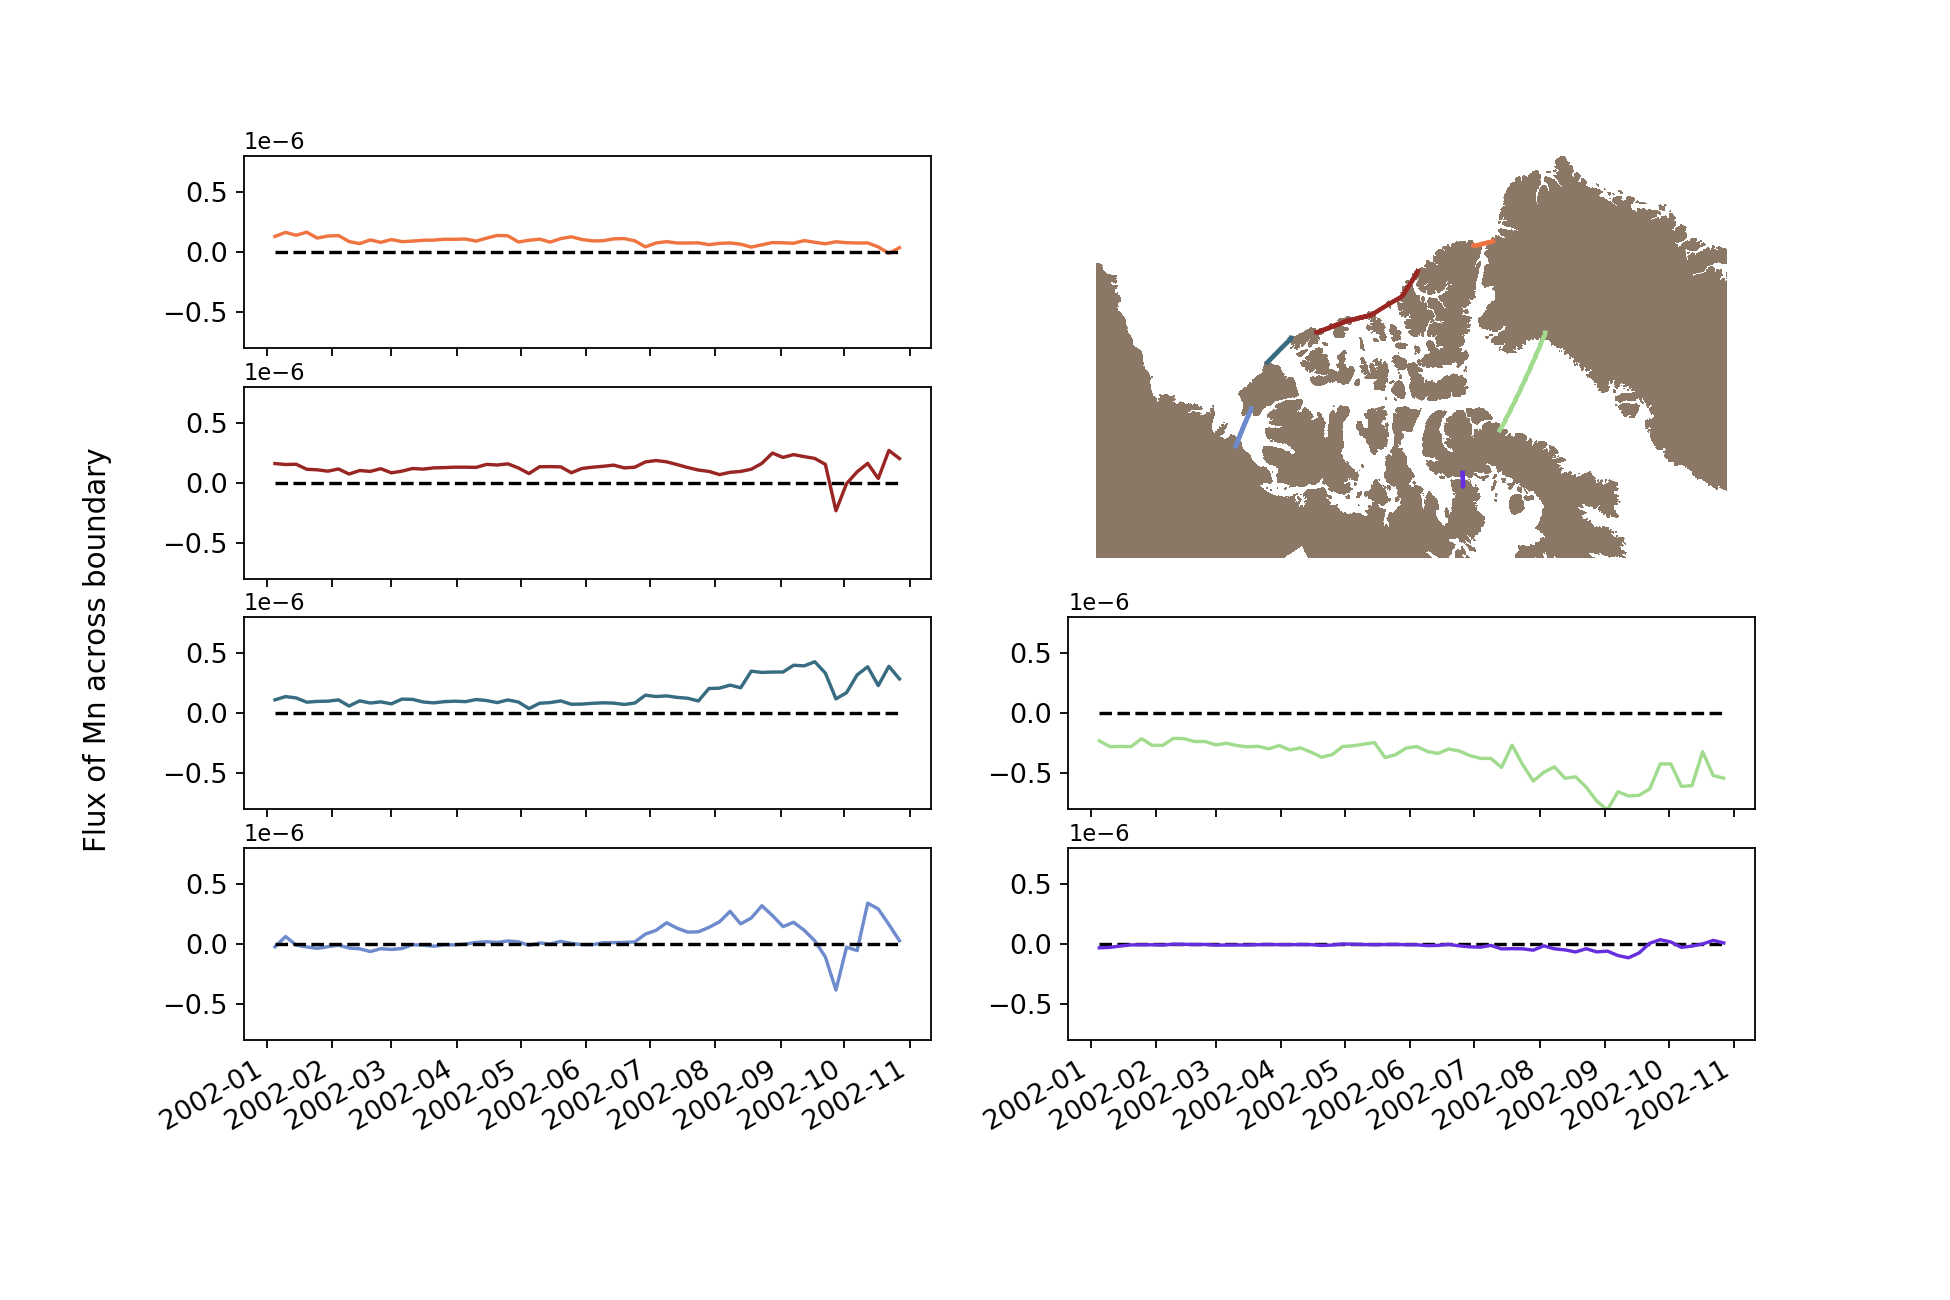

In [155]:
fig,ax = plt.subplots(4,2, figsize=(12,8))

fig.autofmt_xdate()

ax2 = plt.subplot2grid((2,2), (0,1), rowspan=1, colspan=2, frameon=False)

ax[0,1].set_visible(False)
ax[1,1].set_visible(False)

ax[0,0].get_xaxis().set_ticklabels([]);
ax[1,0].get_xaxis().set_ticklabels([]);
ax[2,0].get_xaxis().set_ticklabels([]);
ax[2,1].get_xaxis().set_ticklabels([]);

fig.text(0.05, 0.5, 'Flux of Mn across boundary',\
         ha='center', va='center', rotation='vertical', fontsize=13) #[mol/L 1/5day 1/area]

# Left 4 time series -- ---------------------------------------------------------
ax[0,0].plot(file_dates, time_series4, c=bdy_colours[3])
ax[1,0].plot(file_dates, time_series3, c=bdy_colours[2])
ax[2,0].plot(file_dates, time_series1, c=bdy_colours[0])
ax[3,0].plot(file_dates, time_series2, c=bdy_colours[1])

for axs in [ax[0,0], ax[1,0], ax[2,0], ax[3,0], ax[2,1], ax[3,1]]:
    axs.plot([file_dates[0], file_dates[-1]], [0, 0], '--k')
    axs.set_ylim([-8e-7, 8e-7])
    axs.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs.tick_params(axis='both', which='major', labelsize=12)

# Right 2 time series -- ---------------------------------------------------------
ax[2,1].plot(file_dates, time_series5, c=bdy_colours[4])
ax[3,1].plot(file_dates, time_series6, c=bdy_colours[5])


# plot map in top right ---------------------------------------------------------
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=4.0e6, height=2.55e6, ax=ax2)
x_model, y_model = proj1(tlons, tlats)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))

lons1 = [lons[int(bdy1_coord[0][i]),int(bdy1_coord[1][i])] for i in range(0,len(bdy1_coord[0]))]
lats1 = [lats[int(bdy1_coord[0][i]),int(bdy1_coord[1][i])] for i in range(0,len(bdy1_coord[0]))]
x1, y1 = proj1(lons1, lats1)
proj1.plot(x1, y1,'-', c=bdy_colours[0], linewidth=2) 

lons2 = [lons[int(bdy2_coord[0][i]),int(bdy2_coord[1][i])] for i in range(0,len(bdy2_coord[0]))]
lats2 = [lats[int(bdy2_coord[0][i]),int(bdy2_coord[1][i])] for i in range(0,len(bdy2_coord[0]))]
x2, y2 = proj1(lons2, lats2)
proj1.plot(x2, y2,'-', c=bdy_colours[1], linewidth=2) 

lons3 = [lons[int(bdy3_coord[0][i]),int(bdy3_coord[1][i])] for i in range(0,len(bdy3_coord[0]))]
lats3 = [lats[int(bdy3_coord[0][i]),int(bdy3_coord[1][i])] for i in range(0,len(bdy3_coord[0]))]
x3, y3 = proj1(lons3, lats3)
proj1.plot(x3, y3,'-', c=bdy_colours[2], linewidth=2) 

lons4 = [lons[int(bdy4_coord[0][i]),int(bdy4_coord[1][i])] for i in range(0,len(bdy4_coord[0]))]
lats4 = [lats[int(bdy4_coord[0][i]),int(bdy4_coord[1][i])] for i in range(0,len(bdy4_coord[0]))]
x4, y4 = proj1(lons4, lats4)
proj1.plot(x4, y4,'-', c=bdy_colours[3], linewidth=2) 

lons5 = [lons[int(bdy5_coord[0][i]),int(bdy5_coord[1][i])] for i in range(0,len(bdy5_coord[0]))]
lats5 = [lats[int(bdy5_coord[0][i]),int(bdy5_coord[1][i])] for i in range(0,len(bdy5_coord[0]))]
x5, y5 = proj1(lons5, lats5)
proj1.plot(x5, y5,'-', c=bdy_colours[4], linewidth=2) 

lons6 = [lons[int(bdy6_coord[0][i]),int(bdy6_coord[1][i])] for i in range(0,len(bdy6_coord[0]))]
lats6 = [lats[int(bdy6_coord[0][i]),int(bdy6_coord[1][i])] for i in range(0,len(bdy6_coord[0]))]
x6, y6 = proj1(lons6, lats6)
proj1.plot(x6, y6,'-', c=bdy_colours[5], linewidth=2) 

fig.savefig('/ocean/brogalla/GEOTRACES/figures/flux_time-series.png', bbox_inches='tight')

(takes about 10 minutes to run)